# Introduction

Let's say we work for a travel agency and we want to know ins and outs of the airline prices for our clients. Keeping their client satisfied is important for almost any business for the company's growth so we want to make sure that we find the best deal for our client and help our client to understand how airline prices varies with different factors. We have a csv file, flight.csv, containing data of our favorite airline. Using this data we will perform some __Airline Analysis__ using different types of __Exploratory Data Analysis__ techniques.

## Column Description
- `miles`: Distance between two airports that flight travels in miles
- `passengers`: Number of passengers on the flight
- `dely`: Arrival delay in minutes
- `inflight_meal`: Whether or not a meal was included in flight?
- `inflight_entertainment`: Are there free entertainment systems in flight?
- `inflight_wifi`: Is there a complimentary wifi on the flight?
- `day_of_week`: Take-off day of the flight
- `weekend`: Is the take-off day a weekend?
- `coach_price`: Average price of the caoch
- `firstclass_price`: Average price for the first-class seats
- `hours`: Time taken by the flight in hours
- `redeye`: Was this flight a late-night flight?

## Import Required Libraries
Start with importing the required libraries for this project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Exploratory Data Analysis

We start with __Initial Data Inspection__ by loading the data and printing the first five rows to get the idea to ensure that the data is loaded properly and observe the columns and data values to get the idea of what we are dealing with.

In [2]:
flight = pd.read_csv("flight.csv")
flight.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


Now to get some __Data Information__ we ask questions like:
1. How many rows are present?
2. How many Null Observations we have?
3. How many unique columns we have and what are their names?
4. What are the data type of each Column?

In [3]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129780 entries, 0 to 129779
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   miles                   129780 non-null  int64  
 1   passengers              129780 non-null  int64  
 2   delay                   129780 non-null  int64  
 3   inflight_meal           129780 non-null  object 
 4   inflight_entertainment  129780 non-null  object 
 5   inflight_wifi           129780 non-null  object 
 6   day_of_week             129780 non-null  object 
 7   redeye                  129780 non-null  object 
 8   weekend                 129780 non-null  object 
 9   coach_price             129780 non-null  float64
 10  firstclass_price        129780 non-null  float64
 11  hours                   129780 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 11.9+ MB


1. There are 129780 rows present in our dataset
2. There are no Null values so there is no need for Dealing with Missing Values
3. There are 12 columns and names are printed on the above output window
4. Data types of each column are as expected

Now to look at the __Statiscal Summary__ of our data to look at the:
1. Number of Unique Variables for each Categorical Data
2. Central Locations: Mean, Median, Mode
3. Spread of the Data: Standard Deviation, Minimum, Maximum, Quartiles

In [4]:
flight.describe(include = "all")

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
count,129780.000000,129780.000000,129780.000000,129780,129780,129780,129780,129780,129780,129780.000000,129780.000000,129780.000000
unique,NaN,NaN,NaN,2,2,2,7,2,2,NaN,NaN,NaN
top,NaN,NaN,NaN,No,Yes,Yes,Saturday,No,Yes,NaN,NaN,NaN
freq,NaN,NaN,NaN,90813,104028,116766,33736,123334,84643,NaN,NaN,NaN
mean,2006.224696,207.723155,13.162845,NaN,NaN,NaN,NaN,NaN,NaN,376.585253,1454.931785,3.631214
std,943.034768,12.776363,41.941680,NaN,NaN,NaN,NaN,NaN,NaN,67.744274,162.590434,1.739118
min,12.000000,135.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,44.415000,939.100000,1.000000
25%,1343.000000,204.000000,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,331.445000,1302.200000,2.000000
50%,1986.000000,210.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,380.560000,1503.840000,4.000000
75%,2468.000000,215.000000,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,426.676250,1582.370000,4.000000


From Summary Statistics we observed that:
1. Clear presence of outlier in `delay`
2. Majority of the flights have entertainment and wifi systems
3. About 70% people don't order infligh meal during the flight
4. 65% of the passengers fly on the weekends

### Data Visualizations

__Data Visualization__ is an important component for __Exploratory Data Analysis__ because it allows the Analyst to:
1. Look at the distribution of Data
2. Understand the relationship between variables
3. Find the pattern (if present) in the Data

and a many of other questions can be answered through __Data Visualization__

Let's start with __Coach Prices__

Our Client tells us the budget for the flight is $500 and want to know if this the reasonable price for the coach.

Average Coach Price: 376.58525308213905
Median Coach Price: 380.56
Maximum Coach Price: 593.635
Minimum Coach Price: 44.415




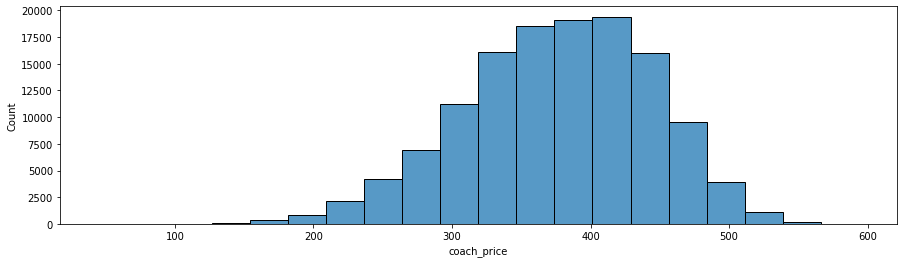

<Figure size 432x288 with 0 Axes>

In [5]:
mean_coach_price = flight['coach_price'].mean()
median_coach_price = flight['coach_price'].median()
max_coach_price = max(flight['coach_price'])
min_coach_price = min(flight['coach_price'])

print(f"Average Coach Price: {mean_coach_price}")
print(f"Median Coach Price: {median_coach_price}")
print(f"Maximum Coach Price: {max_coach_price}")
print(f"Minimum Coach Price: {min_coach_price}")
print("\n")

plt.figure(figsize = (15, 4))

sns.histplot(flight['coach_price'], bins = 20)
plt.show()
plt.clf()

Ans. While the data is Right Skewed $500 does seem like a bit over priced.

Now to __Analyze Coach Prices for 8 hour long flights__

Now our client tells us that the flight is 10 hour long. Does $500 seems like over priced?

Average Coach Price for 8 hours: 431.834377372817
Median Coach Price for 8 hours: 437.115
Maximum Coach Price for 8 hours: 593.635
Minimum Coach Price for 8 hours: 170.77




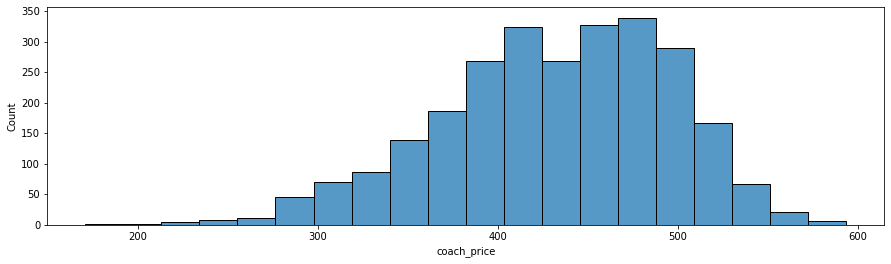

<Figure size 432x288 with 0 Axes>

In [6]:
mean_coach_price_8hours = flight['coach_price'][flight['hours'] == 8].mean()
median_coach_price_8hours = flight['coach_price'][flight['hours'] == 8].median()
max_coach_price_8hours = max(flight['coach_price'][flight['hours'] == 8])
min_coach_price_8hours = min(flight['coach_price'][flight['hours'] == 8])

print(f"Average Coach Price for 8 hours: {mean_coach_price_8hours}")
print(f"Median Coach Price for 8 hours: {median_coach_price_8hours}")
print(f"Maximum Coach Price for 8 hours: {max_coach_price_8hours}")
print(f"Minimum Coach Price for 8 hours: {min_coach_price_8hours}")
print("\n")

plt.figure(figsize = (15, 4))

sns.histplot(flight['coach_price'][flight['hours'] == 8], bins = 20)
plt.show()
plt.clf()

Ans. For a 8 hour long flight $500 seems reasonable for the flight.

__Analyze Flight Delay__

For connecting flight, delay in the arrival time of the flights plays very important role. So, we would like to know how is the flight delay is distributed.

## Analyze Flight Delay

Average Delay in minutes: 13.162844814301126
Median Delay in minutes: 10.0
Maximum Delay in minutes: 1560
Minimum Delay in minutes: 0




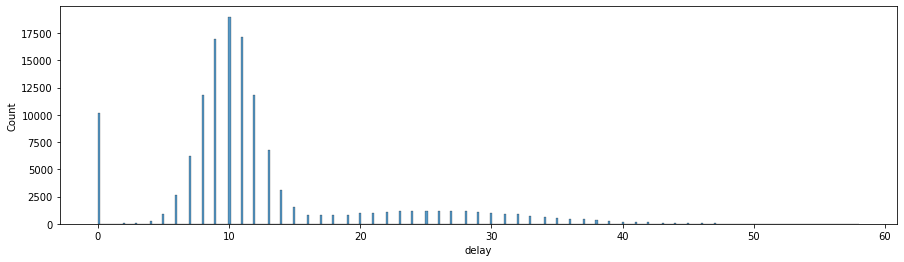

<Figure size 432x288 with 0 Axes>

In [7]:
mean_delay = flight['delay'].mean()
median_delay = flight['delay'].median()
max_delay = max(flight['delay'])
min_delay = min(flight['delay'])

print(f"Average Delay in minutes: {mean_delay}")
print(f"Median Delay in minutes: {median_delay}")
print(f"Maximum Delay in minutes: {max_delay}")
print(f"Minimum Delay in minutes: {min_delay}")
print("\n")

plt.figure(figsize = (15, 4))

sns.histplot(flight['delay'][flight['delay'] <= 100])
plt.show()
plt.clf()

While there is the presence of outliers with a longer delay average delay is still about 13 minutes

__Relation Between Coach Prices and First-class Prices__

We would like to know if higher coach price flights have higher first class price.

<Figure size 1080x288 with 0 Axes>

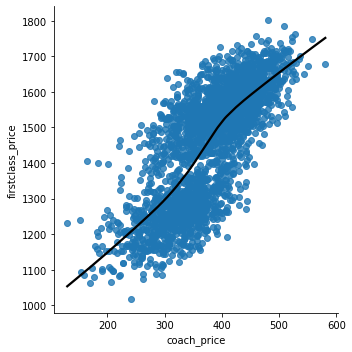

<Figure size 432x288 with 0 Axes>

In [8]:
perc = 0.02
flight_sub = flight.sample(n = int(flight.shape[0]*perc))
 
plt.figure(figsize = (15, 4))

sns.lmplot(x = "coach_price", y = "firstclass_price", data = flight_sub, line_kws={'color': 'black'}, lowess=True)
plt.show()
plt.clf()

Looking at the trend we say that a high coach price flight is likely to have high first class price

__Relation Between Facilities and Coach Prices__

Does flights which provides inflights facilities have more coach prices?

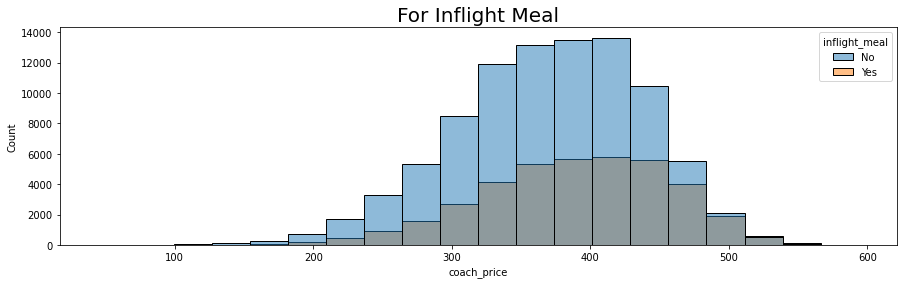

<Figure size 432x288 with 0 Axes>

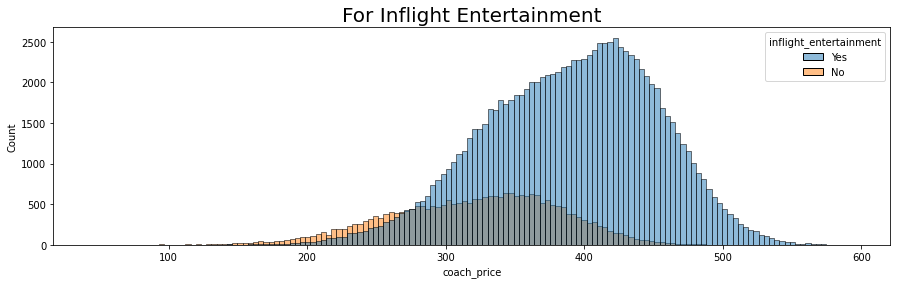

<Figure size 432x288 with 0 Axes>

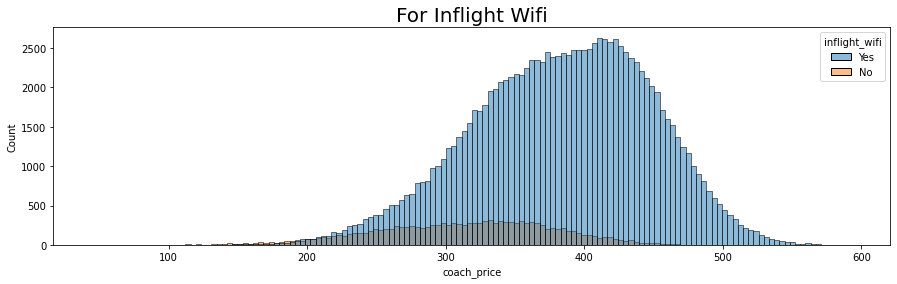

<Figure size 432x288 with 0 Axes>

In [9]:
# Inflight Meal
plt.figure(figsize = (15, 4))
sns.histplot(flight, x = "coach_price", hue = flight.inflight_meal, bins = 20)
plt.title("For Inflight Meal", fontsize = 20)
plt.show()
plt.clf()

# Inflight Entertainment
plt.figure(figsize = (15, 4))
sns.histplot(flight, x = "coach_price", hue = flight.inflight_entertainment)
plt.title("For Inflight Entertainment", fontsize = 20)
plt.show()
plt.clf()

# Inflight Wifi
plt.figure(figsize = (15, 4))
sns.histplot(flight, x = "coach_price", hue = flight.inflight_wifi)
plt.title("For Inflight Wifi", fontsize = 20)
plt.show()
plt.clf()

1. Although lesser number of passengers gets meal during the flight, coach prices still following the similar distribution for both the passengers who gets the meal and those who doesn't gets the meal.

2. For inflight entertainment like TV, flights are charging more coach price than the flight with no inflight entertainment.

3. Flights with inflight wifi are charging higher coach prices than the flights with no inflight wifi.

__Number of Passengers vs Traveling Distance__

We would like to know how the number of passengers varies with the traveling distance.

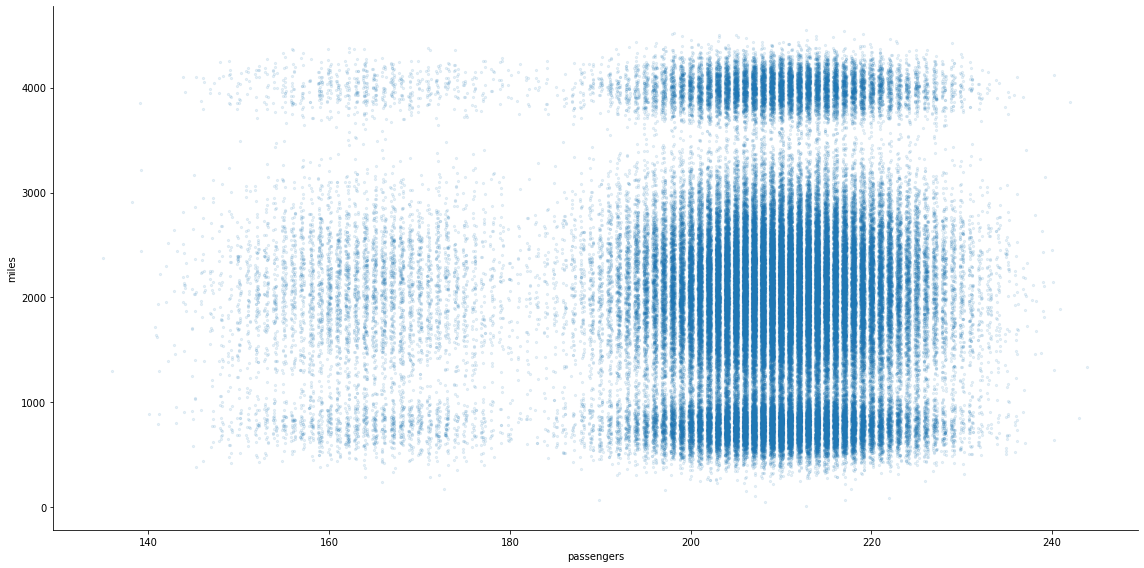

<Figure size 432x288 with 0 Axes>

In [10]:
sns.lmplot(x = "passengers", y = "miles", data = flight,
           x_jitter = 0.25, scatter_kws={"s": 5, "alpha":0.1},
           fit_reg = False, height = 8, aspect = 2)
plt.show()
plt.clf()

We observe a very interesting thing here and that is a gap at 185 as if there are two types flights one with less capacity and other with high capacity. (Just an intuition)

__Relation between Coach Prices and First-class Prices by Weekends vs Weekdays__

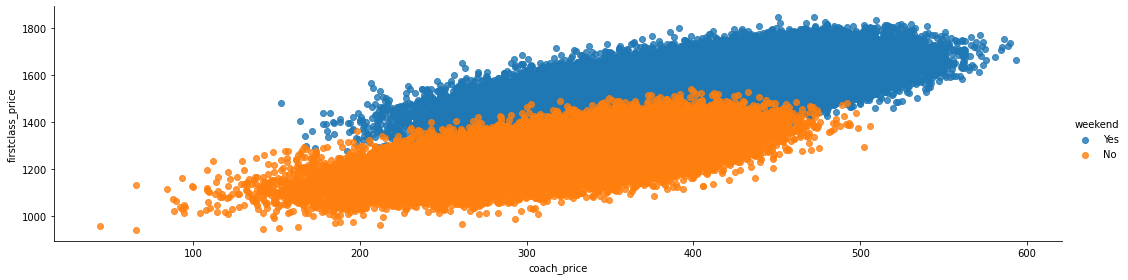

<Figure size 432x288 with 0 Axes>

In [11]:
sns.lmplot(x = 'coach_price', y = 'firstclass_price', hue = 'weekend', data = flight, fit_reg= False, height = 4, aspect = 15/4)
plt.show()
plt.clf()

On weekends both Coach Prices and First Class Prices are higher and that makes sense because there would be more demand of travel during weekends as compared to the weekdays

__Coach Price variation by Days of Week for Overnight Flights__

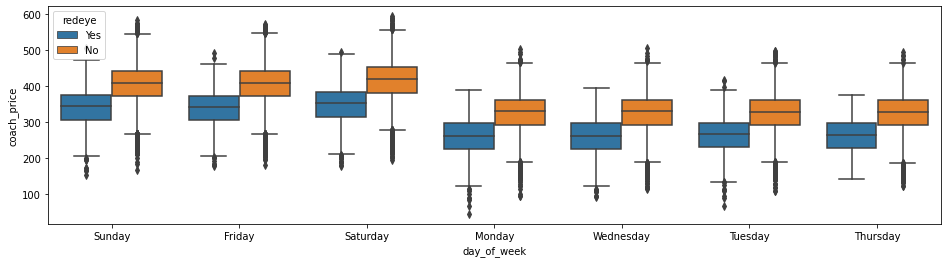

<Figure size 432x288 with 0 Axes>

In [12]:
plt.figure(figsize = (16, 4))

sns.boxplot(x = "day_of_week", y = "coach_price", hue = "redeye", data = flight)
plt.show()
plt.clf()

Overnight flights charges are higher on weekends but lesser compared to the non-overnight flights